In [1]:
filename="Tweeter_dump_docano.json"

In [2]:
import pandas as pd
import json

In [3]:
label_dict = {
    33:'Medyczne-diagnoza',
    34:'Medyczne',
    35:'Niejednoznaczny',
    36:'Error',
    37:'Niemedyczny'
}

In [4]:
df = pd.read_json(filename,lines=True)
df = df.drop(columns=['annotation_approver','meta'])
df=df.explode('annotations')
df=df.dropna()
df=df.reset_index()
df


,index,id,text,annotations
0,2,169095,"@nefernefer35 Maszka chora cały rok, wraca do ...","{'label': 33, 'user': 2, 'created_at': '2020-1..."
1,3,169096,"👮‍♂️👮‍♂️ z Łukowa, którzy jako pierwsi z jedno...","{'label': 33, 'user': 6, 'created_at': '2020-1..."
2,5,169098,Filmtipp: GERMANIA beim #widerstandskino in Wi...,"{'label': 36, 'user': 2, 'created_at': '2020-1..."
3,7,169100,@zsekrk Łopatologicznie. Jeżeli ciężej oddycha...,"{'label': 34, 'user': 6, 'created_at': '2020-1..."
4,10,169104,"Swoim najcenniejszym darem - krwią, podzielili...","{'label': 34, 'user': 6, 'created_at': '2020-1..."
...,...,...,...,...
2353,21457,176172,#TCMB ile yapılan swap işlemlerinde bugün dönü...,"{'label': 36, 'user': 6, 'created_at': '2020-1..."
2354,21458,176184,"@domurzy Jej ekscelencja i hasło „Liga rządzi,...","{'label': 37, 'user': 6, 'created_at': '2020-1..."
2355,21459,177168,"Zdemolowano lokal, niszcząc zagraniczne lekars...","{'label': 37, 'user': 3, 'created_at': '2020-1..."
2356,21460,177186,"И закрой хлебало ещё раз, говорю про втф в осо...","{'label': 36, 'user': 3, 'created_at': '2020-1..."


In [5]:
annotations = pd.json_normalize(df.annotations)
annotations

,label,user,created_at,updated_at
0,33,2,2020-12-19T17:32:56.724102Z,2020-12-19T17:32:56.724173Z
1,33,6,2020-12-16T17:43:15.486769Z,2020-12-16T17:43:15.486796Z
2,36,2,2020-12-19T17:33:03.908403Z,2020-12-19T17:33:03.908431Z
3,34,6,2020-12-16T17:43:30.463363Z,2020-12-16T17:43:30.463396Z
4,34,6,2020-12-16T17:43:58.544260Z,2020-12-16T17:43:58.544287Z
...,...,...,...,...
2353,36,6,2020-12-19T21:58:56.286488Z,2020-12-19T21:58:56.286518Z
2354,37,6,2020-12-19T21:59:08.458223Z,2020-12-19T21:59:08.458250Z
2355,37,3,2020-12-19T22:28:43.082305Z,2020-12-19T22:28:43.082331Z
2356,36,3,2020-12-19T22:28:52.758241Z,2020-12-19T22:28:52.758270Z


In [6]:
norm = pd.json_normalize(df['annotations'])
df['annotations']=norm['label']
df['user'] = norm['user']
coincidence_matrix = df.drop(columns=['index','text'])
df=df.drop(columns=['user'])
df.annotations=df.annotations.replace(label_dict)

In [7]:
ids = pd.unique(df.id)
df

,index,id,text,annotations
0,2,169095,"@nefernefer35 Maszka chora cały rok, wraca do ...",Medyczne-diagnoza
1,3,169096,"👮‍♂️👮‍♂️ z Łukowa, którzy jako pierwsi z jedno...",Medyczne-diagnoza
2,5,169098,Filmtipp: GERMANIA beim #widerstandskino in Wi...,Error
3,7,169100,@zsekrk Łopatologicznie. Jeżeli ciężej oddycha...,Medyczne
4,10,169104,"Swoim najcenniejszym darem - krwią, podzielili...",Medyczne
...,...,...,...,...
2353,21457,176172,#TCMB ile yapılan swap işlemlerinde bugün dönü...,Error
2354,21458,176184,"@domurzy Jej ekscelencja i hasło „Liga rządzi,...",Niemedyczny
2355,21459,177168,"Zdemolowano lokal, niszcząc zagraniczne lekars...",Niemedyczny
2356,21460,177186,"И закрой хлебало ещё раз, говорю про втф в осо...",Error


In [8]:
coincidence_matrix

,id,annotations,user
0,169095,33,2
1,169096,33,6
2,169098,36,2
3,169100,34,6
4,169104,34,6
...,...,...,...
2353,176172,36,6
2354,176184,37,6
2355,177168,37,3
2356,177186,36,3


In [9]:

def vote(ann_id):
    
    vote_dict = {'Medyczne-diagnoza':0,'Medyczne':0,'Niemedyczny':0,'Niejednoznaczny':0,'Error':0}
    temp_df= df.loc[df['id'] == ann_id]
    text=temp_df['text'].iloc[0]
    groups_ann = temp_df.groupby(by=["annotations"]).count()

    max_vote=0
    vote_result = "NONE"
    for row in groups_ann.iterrows():
        ann=row[0]   
        vote_dict[ann]+=row[1][0]
    print(vote_dict,'id ',ann_id)
    for vote_key in vote_dict.keys():
        if max_vote < vote_dict[vote_key]:
            max_vote = vote_dict[vote_key]
            vote_result=vote_key
        elif max_vote == vote_dict[vote_key]:
            vote_result="Remis-sporny" 
    if vote_result=="Remis-sporny":
        print('spór')
        #print(ann_id,vote_dict)
    res =pd.DataFrame({
        'id':[ann_id],
        'text':[str(text)],
        'annotation_after_vote':[vote_result],
    })
    
    return res, vote_dict
            
    
    

In [10]:
result = pd.DataFrame([],columns=['id','text','annotation_after_vote'])
votes = pd.DataFrame([],columns=['Medyczne-diagnoza','Medyczne','Niemedyczny','Niejednoznaczny','Error'])
for ann_id in ids:
    vote_result,vote_dict=vote(ann_id)
    result=result.append(vote_result,ignore_index=True)
    votes = votes.append(vote_dict,ignore_index=True)


{'Medyczne-diagnoza': 1, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  169095
{'Medyczne-diagnoza': 1, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  169096
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 1} id  169098
{'Medyczne-diagnoza': 0, 'Medyczne': 1, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  169100
{'Medyczne-diagnoza': 0, 'Medyczne': 1, 'Niemedyczny': 0, 'Niejednoznaczny': 1, 'Error': 0} id  169104
spór
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 1} id  169107
{'Medyczne-diagnoza': 0, 'Medyczne': 1, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  169108
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 1, 'Niejednoznaczny': 0, 'Error': 0} id  169112
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 3} id  169110
{'Medyczne-diagnoza': 0, 'Medyczne': 1, 'Niemedyczny': 0, 'Niejednoz

In [11]:
import simpledorff

In [12]:
simpledorff.calculate_krippendorffs_alpha_for_df(coincidence_matrix,experiment_col='id',
                                                 annotator_col='user',
                                                 class_col='annotations')

0.6268508889219037

In [13]:
result.reset_index()


,index,id,text,annotation_after_vote
0,0,169095,"@nefernefer35 Maszka chora cały rok, wraca do ...",Medyczne-diagnoza
1,1,169096,"👮‍♂️👮‍♂️ z Łukowa, którzy jako pierwsi z jedno...",Medyczne-diagnoza
2,2,169098,Filmtipp: GERMANIA beim #widerstandskino in Wi...,Error
3,3,169100,@zsekrk Łopatologicznie. Jeżeli ciężej oddycha...,Medyczne
4,4,169104,"Swoim najcenniejszym darem - krwią, podzielili...",Remis-sporny
...,...,...,...,...
2274,2274,176172,#TCMB ile yapılan swap işlemlerinde bugün dönü...,Error
2275,2275,176184,"@domurzy Jej ekscelencja i hasło „Liga rządzi,...",Niemedyczny
2276,2276,177168,"Zdemolowano lokal, niszcząc zagraniczne lekars...",Niemedyczny
2277,2277,177186,"И закрой хлебало ещё раз, говорю про втф в осо...",Error


In [14]:
result.loc[0]['text']

'@nefernefer35 Maszka chora cały rok, wraca do zdrowia, rok temu szpik przestał jej produkować krwinki czerwone,miała 15x transfuzję krwi, ostatnią   01.02. 2018 , w grudniu w tamtym roku lekarz z Czech dawał jej 5% szans na przeżycie miesiąca, twierdząc równocześnie, że takie psy nie żyją...  https://t.co/LGqFZyFZ8k'

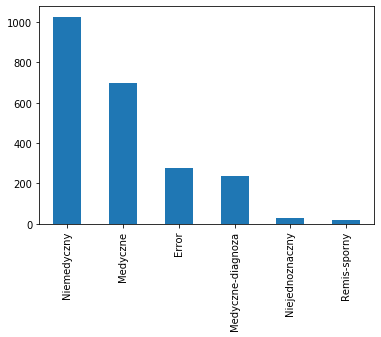

In [15]:
result['annotation_after_vote'].value_counts().plot(kind='bar')

In [16]:
REMIS  =  result.where(result['annotation_after_vote']=='Remis-sporny').dropna().reset_index()
REMIS

,index,id,text,annotation_after_vote
0,4,169104,"Swoim najcenniejszym darem - krwią, podzielili...",Remis-sporny
1,17,169128,Naukowcom z #GlattLaboratory w #MCB @Jagiellon...,Remis-sporny
2,25,169152,"Trwa okres przeziębień, #grypy i katarów, dlat...",Remis-sporny
3,26,169146,Laura ma tylko 18 miesięcy. Cierpi na SMA. By ...,Remis-sporny
4,52,169212,podobno służba zdrowia leży. Przychodnie w sta...,Remis-sporny
5,86,169284,"Dyrektor techniczna #WHO ds. COVID-19, ekspert...",Remis-sporny
6,91,169296,"👮‍♂️👮‍♂️ z Łukowa, którzy jako pierwsi z jedno...",Remis-sporny
7,107,169332,"Pomagamy Jackowi Gaworskiemu - szermierzowi, s...",Remis-sporny
8,127,169371,Alkohol VS Rak – dlaczego alkohol może zwięk...,Remis-sporny
9,133,169392,W Kamieńsku zostaje 1 apteka. Gmina 5900 miesz...,Remis-sporny


In [17]:
REMIS.to_csv('remisy.csv')

In [25]:
result - REMIS

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [29]:
result

,id,text,annotation_after_vote
0,169095,"@nefernefer35 Maszka chora cały rok, wraca do ...",Medyczne-diagnoza
1,169096,"👮‍♂️👮‍♂️ z Łukowa, którzy jako pierwsi z jedno...",Medyczne-diagnoza
2,169098,Filmtipp: GERMANIA beim #widerstandskino in Wi...,Error
3,169100,@zsekrk Łopatologicznie. Jeżeli ciężej oddycha...,Medyczne
4,169104,"Swoim najcenniejszym darem - krwią, podzielili...",Remis-sporny
...,...,...,...
2274,176172,#TCMB ile yapılan swap işlemlerinde bugün dönü...,Error
2275,176184,"@domurzy Jej ekscelencja i hasło „Liga rządzi,...",Niemedyczny
2276,177168,"Zdemolowano lokal, niszcząc zagraniczne lekars...",Niemedyczny
2277,177186,"И закрой хлебало ещё раз, говорю про втф в осо...",Error


In [56]:
dataset =result.where(result['annotation_after_vote']!='Remis-sporny').dropna().drop(columns=['id'])

In [57]:
dataset =dataset.where(result['annotation_after_vote']!='Error').dropna()
dataset =dataset.where(result['annotation_after_vote']!='Niejednoznaczny').dropna()

In [58]:
dataset = dataset.rename(columns={'annotation_after_vote':'label'})

In [59]:
dataset

,text,label
0,"@nefernefer35 Maszka chora cały rok, wraca do ...",Medyczne-diagnoza
1,"👮‍♂️👮‍♂️ z Łukowa, którzy jako pierwsi z jedno...",Medyczne-diagnoza
3,@zsekrk Łopatologicznie. Jeżeli ciężej oddycha...,Medyczne
6,"Uwaga,w brunatnej mordowni @MZ_GOV_PL odbywa s...",Medyczne
7,Narzekacie na polską służbę zdrowia? Szpitale ...,Niemedyczny
...,...,...
2272,@kazirodki666 To nie do końca tak że ci nie uw...,Medyczne-diagnoza
2273,"Już w maju było wiadomo, że sprowadzone przez ...",Medyczne
2275,"@domurzy Jej ekscelencja i hasło „Liga rządzi,...",Niemedyczny
2276,"Zdemolowano lokal, niszcząc zagraniczne lekars...",Niemedyczny


In [60]:
dataset.to_csv("medical_twiteer.csv")